<a href="https://colab.research.google.com/github/kedartatwawadi/ML-learnings/blob/master/keras_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import packages
import tensorflow as tf
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

We will first load the simple MNIST toy dataset. Keras already provides a convenient way to load MNIST, using `keras.datasets `https://keras.io/api/datasets/. 

In [2]:
# Load data
# In this tutorial, we will use keras.datasets to load data into numpy arrays
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
print(f"x_train shape: {x_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"x_train type {x_train.dtype}")
print(f"y_train type {y_train.dtype}")

print(f"x_test shape: {x_test.shape}")
print(f"y_test shape: {y_test.shape}")

x_train shape: (60000, 28, 28)
y_train shape: (60000,)
x_train type uint8
y_train type uint8
x_test shape: (10000, 28, 28)
y_test shape: (10000,)


In [3]:
x_train[:9].shape

(9, 28, 28)

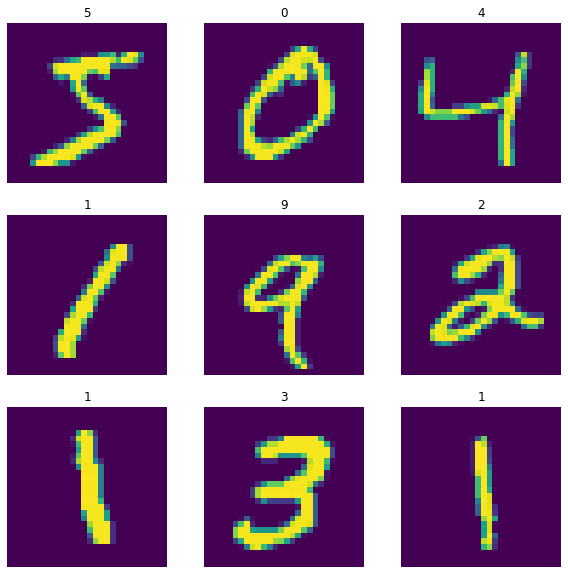

In [4]:
#Let us visualize some examples
#Some important tips on Matplotlib:
# subplot(3,3, ...) -> specifies a 3x3 grid in which to display the images.
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(x_train[i])
    plt.title(int(y_train[i]))
    plt.axis("off")

In [5]:
# As the data is uint8, let us convert it to float32 in numpy and to [0,1] range
x_train = np.expand_dims(x_train.astype(np.float32)/255.0, axis=3)
x_test = np.expand_dims(x_test.astype(np.float32)/255.0, axis=3)


In [6]:
# Let us build out the model!
# keras.Input:https://keras.io/api/layers/core_layers/input/ defines a placeholder (without the batch size)
inputs = keras.Input(shape=(28,28,1))

In [7]:
# Let us build out the model in a functional way
def build_model(inputs):
  x = layers.Conv2D(16, 3, activation="relu")(inputs)
  x = layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2))(x)
  x = layers.Conv2D(32, 3, activation="relu")(x)
  x = layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2))(x)
  x = layers.Conv2D(64, 3, activation="relu")(x)
  x = layers.Flatten()(x)
  outputs = layers.Dense(10)(x)
  return outputs

In [8]:
# Let us form the model here
# keras.Model: https://www.tensorflow.org/api_docs/python/tf/keras/Model is a data strucure which takes inputs and outputs as arguments
outputs = build_model(inputs)
model = keras.Model(inputs=inputs, outputs=outputs, name="mnist_model")
model.summary()

Model: "mnist_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          18496     
_________________________________________________________________
flatten (Flatten)            (None, 576)               

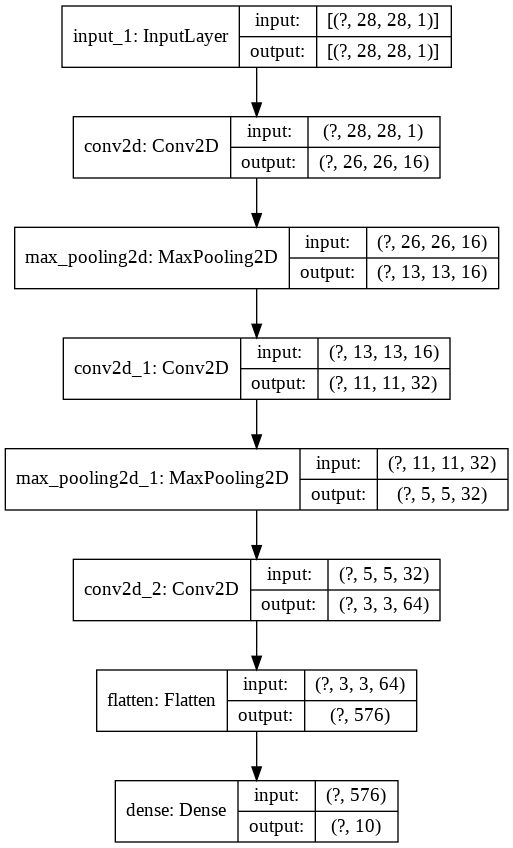

In [9]:
# We can also plot the model!
keras.utils.plot_model(model, "my_first_model.png", show_shapes=True)

In [10]:
# compile the model
# TODO: What does compiling the model imply?: https://keras.io/api/models/model_training_apis/
model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True), #https://www.tensorflow.org/api_docs/python/tf/keras/losses/SparseCategoricalCrossentropy
    optimizer=keras.optimizers.Adam(), 
    metrics=["accuracy"],
)

In [11]:
# run the training
history = model.fit(x_train, y_train, batch_size=32, epochs=1, validation_split=0.2)

test_scores = model.evaluate(x_test, y_test, verbose=2)
print("Test loss:", test_scores[0])
print("Test accuracy:", test_scores[1])

1500/1500 [==============================] - 35s 24ms/step - loss: 0.1994 - accuracy: 0.9385 - val_loss: 0.0820 - val_accuracy: 0.9762
313/313 - 2s - loss: 0.0688 - accuracy: 0.9787
Test loss: 0.06881596893072128
Test accuracy: 0.9786999821662903
